### PREVISÃO DO SCORE DE CRÉDITO COM REGRESSÃO LINEAR

Criação de modelo preditivo de machine learning para prever o score de crédito do cliente<br>
Fonte: Canal Nerd dos Dados

Etapa 1: Importando os dados e as bibliotecas

In [2]:
# Iniciamos importando as bibliotecas e pacotes que iremos utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para o scikit-learn, iremos importar apenas as funções que iremos utilizar

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Configurações para exibir todas as colunas do df
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Importando os dados
df = pd.read_excel('dados_credito.xlsx')

Etapa 2: Análise Exploratória e Tratamento dos Dados

In [ ]:
# Verificando a quantidade de registros e rótulos do df
df.shape

(10476, 17)

In [5]:
# Vendo as primeiras linhas do df
df.head()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
4,5,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667


In [6]:
# Como o conjunto de dados é no formato de Excel, é importante verificarmos a cauda do df também
df.tail()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10471,10472,PR,51,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
10472,10473,SP,48,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
10473,10474,RJ,51,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
10474,10475,RJ,48,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667
10475,10476,PR,51,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100,2,40000,39.666667


In [ ]:
# Verificando os tipos de dados das colunas, e analisando as transformações necessárias
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

In [8]:
# Não iremos utilizar a coluna 'Código Cliente', então iremos removê-la
df.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [10]:
# Na etapa df.info(), vemos que a coluna 'Ultimo_salario'os dados são do tipo object. Vamos investigar o motivo
df.groupby('ULTIMO_SALARIO').size()

# Após a execução, vemos que é devido a existência dos valores "SEM DADOS". Vamos tratar isso em seguida

ULTIMO_SALARIO
1800         846
2200         792
3100         792
3900         792
4500         468
4800         792
5300         522
6100         522
6800         611
9000         522
9800         468
11500        790
13000        522
15000        522
17500        522
18300        522
22000        468
SEM DADOS      1
dtype: int64

In [11]:
# Para não perdermos os registros que estão com esse valor "SEM DADOS", inicialmente vamos tornar estes dados com valor nulo
df.replace('SEM DADOS', np.nan, inplace=True)

In [13]:
# Agora, vamos converter a coluna para o tipo float
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].astype(np.float64)

In [ ]:
# Agora, note que há 3 valores que são nulos nessa coluna. Vamos tratá-los em seguida.
df.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                3
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [17]:
# Vamos utilizar a mediana dos valores da coluna 'ULTIMO_SALARIO' para substituir os nulos
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].fillna((df['ULTIMO_SALARIO'].median()))


In [18]:
# Conferindo se não sobraram valores nulos
df.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                0
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [19]:
# Reavaliando as variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10476 non-null  object 
 1   IDADE                       10476 non-null  int64  
 2   ESCOLARIDADE                10476 non-null  object 
 3   ESTADO_CIVIL                10476 non-null  object 
 4   QT_FILHOS                   10476 non-null  int64  
 5   CASA_PROPRIA                10476 non-null  object 
 6   QT_IMOVEIS                  10476 non-null  int64  
 7   VL_IMOVEIS                  10476 non-null  int64  
 8   OUTRA_RENDA                 10476 non-null  object 
 9   OUTRA_RENDA_VALOR           10476 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 12  ULTIMO_SALARIO              10476 non-null  float64
 13  QT_CARROS                   104

In [20]:
# Avaliando as medidas estatísticas básicas
df.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000
mean,41.054124,1.122566,0.847079,238453.608247,641.237113,43.070447,8286.531119,0.936426,40996.563574,51.058706
std,13.878162,1.113537,0.957374,265843.934416,1295.978195,40.851521,5826.589775,0.806635,47404.214062,27.306340
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,28.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.166667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,72.666667
max,65.000000,42.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


In [22]:
# Avaliando outliers de colunas numéricas

# Aqui, iremos aplicar uma técnica de criar uma lista com as colunas numéricas, para plotarmos os gráficos de uma só vez

variaveis_numericas = []

for i in df.columns[0:16].to_list():
    if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        print(i, ':', df.dtypes[i])
        variaveis_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : float64


In [23]:
# Verificando a lista com as colunas que criamos acima
variaveis_numericas

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE']

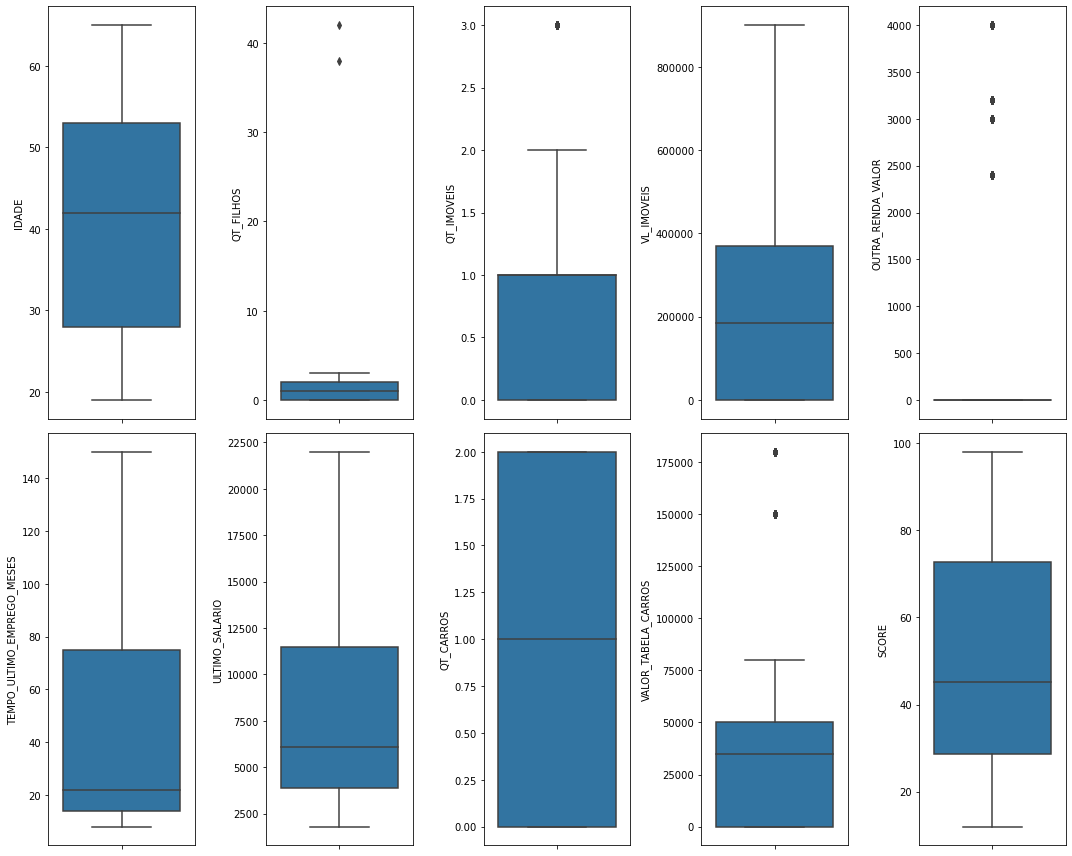

In [28]:
# Agora, vamos realizar a plotagem dos boxplots de uma vez só, com o objetivo de identificarmos outliers

# Tamanho de exibição dos gráficos
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

# Disposição dos gráficos na tela
f, axes = plt.subplots(2, 5) # 2 linhas e 5 colunas

linha = 0 
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data=df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0

plt.show()


In [29]:
# Avaliando os resultados dos gráficos, vemos que algumas colunas indicam a existência de outliers.
# Iremos investigar se os valores de fato são outliers a seguir.

# iniciando pela coluna "qt_filhos"
df.loc[df['QT_FILHOS'] > 4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67.166667
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000


In [30]:
# Vemos dois registros, que de fato são outliers, afinal, são registrados 38 e 42 filhos.
# Vamos excluir estes registros. 

df.drop(df.loc[df['QT_FILHOS'] > 4].index, inplace=True)

In [ ]:
# A próxima coluna que vamos avaliar os possíveis outliers é a coluna 'outra_renda_valor' 
df.groupby(['OUTRA_RENDA_VALOR']).size()

# Vemos que, apesar da maioria dos registros não apresentarem valores, muitos clientes possuem outra renda, ou seja,
# não categorizam outliers

OUTRA_RENDA_VALOR
0       8350
2400     468
3000     612
3200     522
4000     522
dtype: int64

In [33]:
# A próxima coluna é a 'valor_tabela_carros' 
df.groupby(['VALOR_TABELA_CARROS']).size()

# Bem como no caso acima, alguns clientes possuem carros mais caros, ou a soma de seus carros levam aos valores altos
# Não vamos alterar nada nessa coluna também 

VALOR_TABELA_CARROS
0         3762
28000      468
30000      791
35000      792
40000      792
48000      522
50000     1314
70000      521
80000      522
150000     468
180000     522
dtype: int64

In [ ]:
# Por fim, a coluna 'qt_imoveis' 
df.groupby(['QT_IMOVEIS']).size()

# Assim como nos casos anteriores, não precisamos alterar, pois os registros não indicam outliers. 

QT_IMOVEIS
0    4680
1    3761
2     989
3    1044
dtype: int64

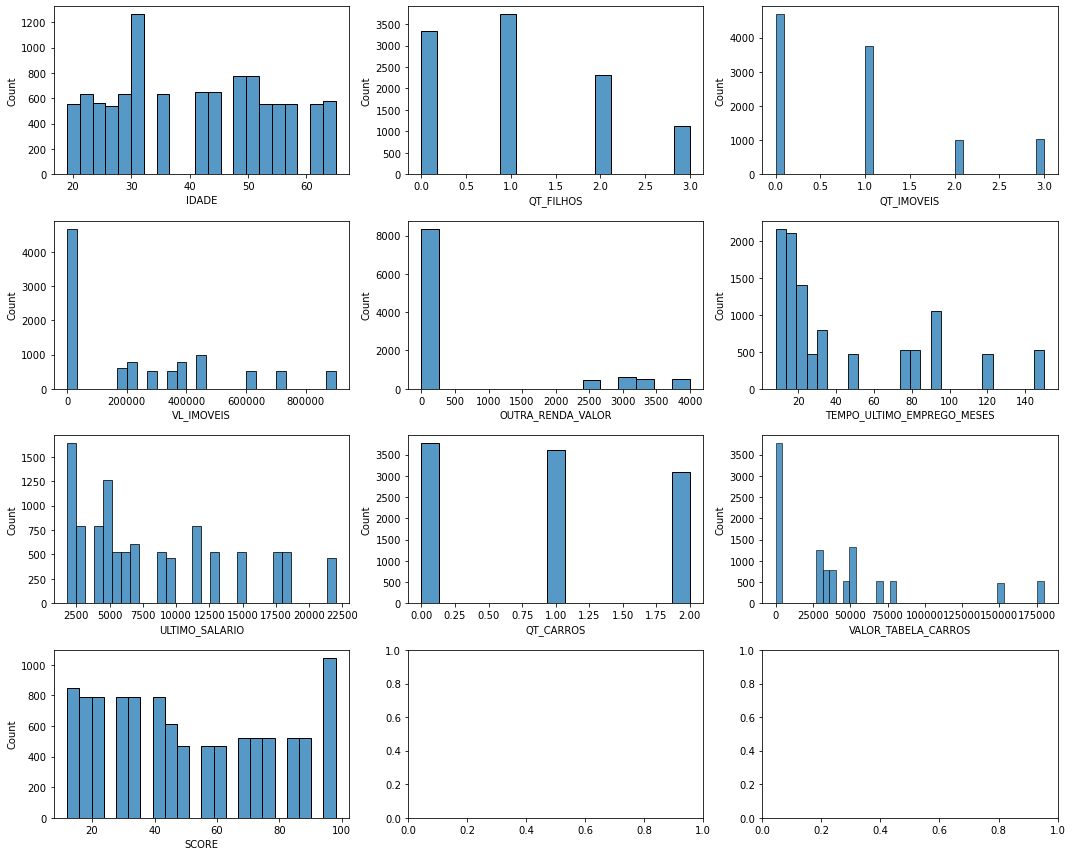

In [35]:
# Agora, vamos gerar histogramas para verificar distribuição dos dados

plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(4, 3)

linha = 0 
coluna = 0 

for i in variaveis_numericas:
    sns.histplot(data=df, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0

plt.show()

In [36]:
# Os histogramas indicam que os dados estão bem dispersos. 

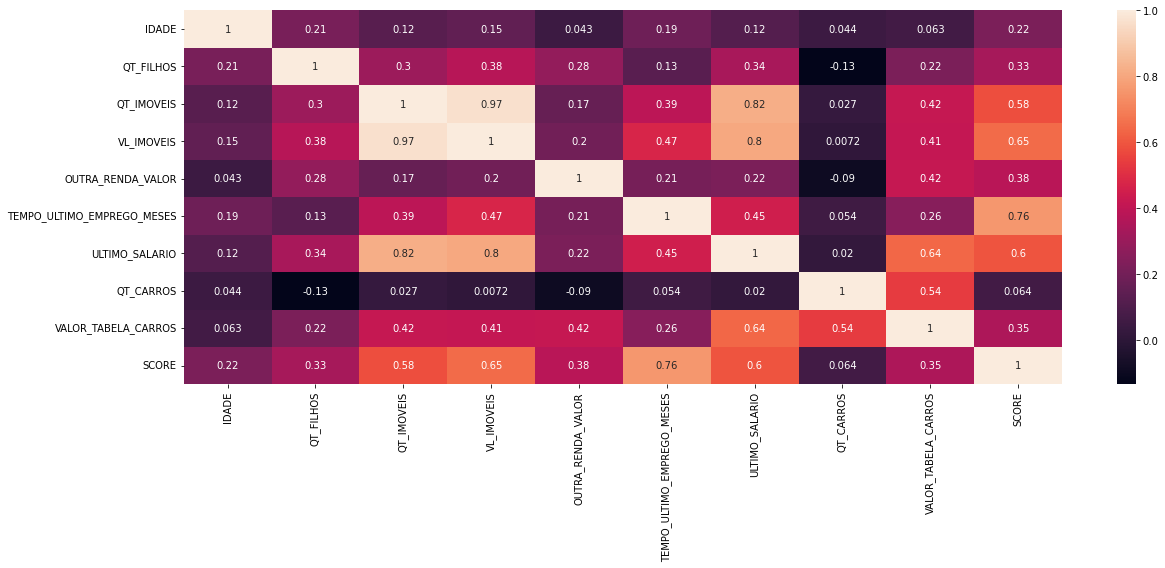

In [37]:
# Agora, iremos verificar a correlação entre os dados

plt.rcParams["figure.figsize"] = [18,8]
ax = sns.heatmap(df.corr(), annot=True)


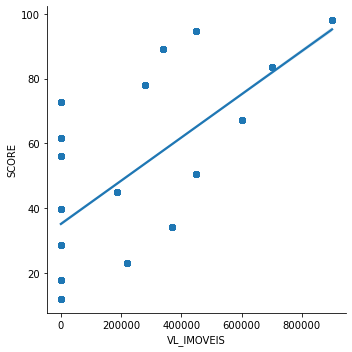

In [38]:
# Avaliando a correlação de algumas variáveis utilizando um gráfico de dispersão
sns.lmplot(x='VL_IMOVEIS', y='SCORE', data=df)

In [ ]:
# Agora, vamos aplicar engenharia de atributos e criar a variável de faixa etária
# Aqui, vou verificar o maior e menor valor para definir os bins em seguida
print(f"Menor idade: {df['IDADE'].min()}")
print(f"Maior idade: {df['IDADE'].max()}")

Menor idade: 19
Maior idade: 65


In [41]:
# Criando a variável

# Definindo o tamanho de cada bin
idade_bins = [0, 30, 40, 50, 60]
idade_categoria = ["Até 30", "31 a 40", "41 a 50", "Maior que 50"]

df["FAIXA ETARIA"] = pd.cut(df['IDADE'], idade_bins, labels=idade_categoria)
df["FAIXA ETARIA"].value_counts()

Até 30          3552
Maior que 50    2448
41 a 50         2070
31 a 40         1270
Name: FAIXA ETARIA, dtype: int64

In [44]:
# Avaliando a média dos scores por faixa etaria
df.groupby(["FAIXA ETARIA"]).mean()["SCORE"]

FAIXA ETARIA
Até 30          44.762950
31 a 40         48.883202
41 a 50         51.440177
Maior que 50    56.123775
Name: SCORE, dtype: float64

In [45]:
# Agora, vamos trabalhar com os dados categóricos, visualizando-os assim como os dados numéricos

variaveis_categoricas = []

for i in df.columns[0:16].to_list():
    if df.dtypes[i] == 'object':
        print(i, ':', df.dtypes[i])
        variaveis_categoricas.append(i)

UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
OUTRA_RENDA : object
TRABALHANDO_ATUALMENTE : object


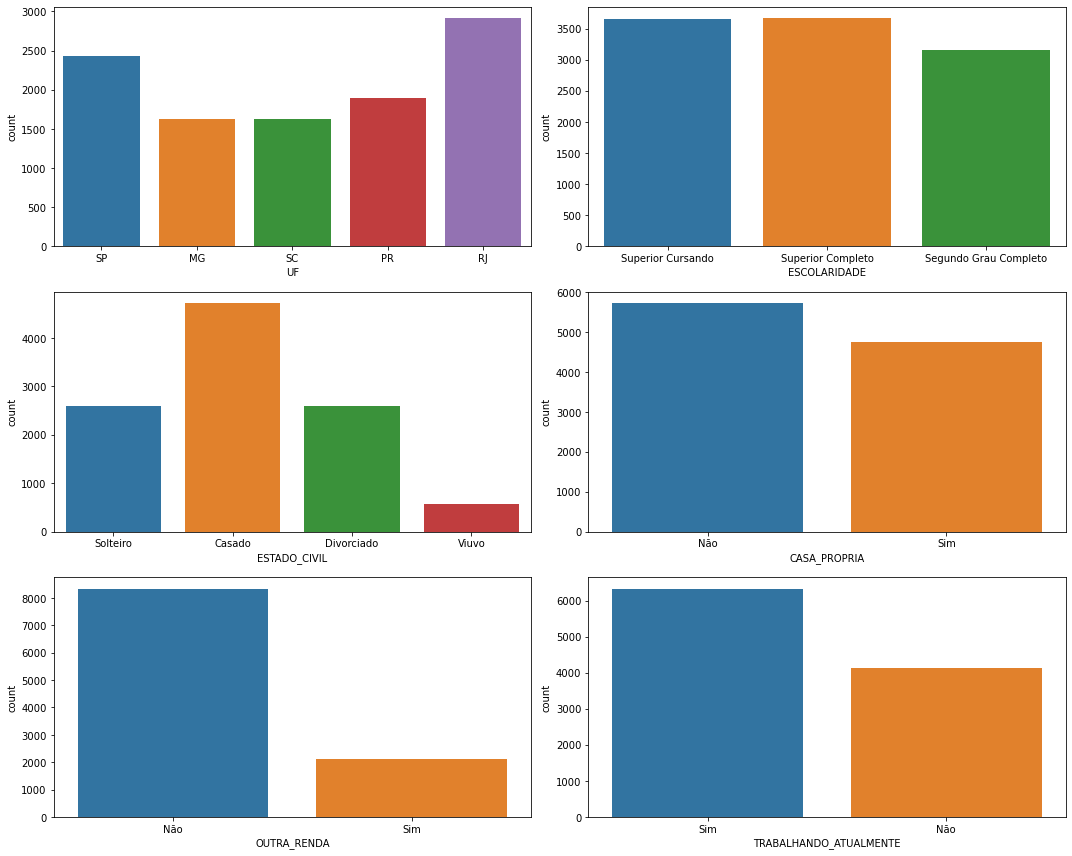

In [49]:
# Agora vamos plotar os gráficos de barra juntos, como fizemos anteriormente

plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(3, 2)

linha = 0 
coluna = 0 

for i in variaveis_categoricas:
    sns.countplot(data=df, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

Etapa 3: Pré Processamento dos Dados

In [ ]:
# Vamos fazer o one-hot encoding nas variáveis categóricas, pois o modelo não lê strings
# O One-hot encoding converte variáveis categóricas em numéricas para o modelo as entender

lb = LabelEncoder()

df['FAIXA ETARIA'] = lb.fit_transform(df['FAIXA ETARIA'])
df['OUTRA_RENDA'] = lb.fit_transform(df['OUTRA_RENDA'])
df['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(df['TRABALHANDO_ATUALMENTE'])
df['ESTADO_CIVIL'] = lb.fit_transform(df['ESTADO_CIVIL'])
df['CASA_PROPRIA'] = lb.fit_transform(df['CASA_PROPRIA'])
df['ESCOLARIDADE'] = lb.fit_transform(df['ESCOLARIDADE'])
df['UF'] = lb.fit_transform(df['UF'])

df.dropna(inplace=True)

In [ ]:
# Verificando como o df ficou após o one-hot encoding
df.head()

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,12.000000,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,18.000000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,23.000000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,28.666667,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,34.166667,2


In [52]:
# Agora todas as nossas variáveis são numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  int32  
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  int32  
 3   ESTADO_CIVIL                10474 non-null  int32  
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  int32  
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  int32  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  int32  
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   104

In [54]:
# Agora, vamos separar a variável alvo, que é o score
# No slicer, pego todas as linhas e somente a coluna 15, que é o índice da coluna "Score"
target = df.iloc[:,15:16]

In [56]:
# Agora vamos separar as varáveis que serão usadas para predição, sem a coluna de score
preditoras = df.copy()

del preditoras['SCORE'] 

preditoras.head()

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,2
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,2
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,2
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,2
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,2


In [57]:
# Separando os dados para treino e teste. Serão 70% de dados de treino e 30% para teste 
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size=0.3, random_state=40)

In [59]:
# Aqui, iremos aplicar normalização nos dados de treino e teste
sc = MinMaxScaler()

X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)


Etapa 4: Criando, avaliando e testando o modelo

In [60]:
# Treino do modelo

modelo = LinearRegression(normalize=True, fit_intercept=True)

modelo = modelo.fit(X_treino_normalizados, y_treino)

In [ ]:
# Avaliando a acurácia
r2_score(y_teste, modelo.fit(X_treino_normalizados, y_treino).predict(X_teste_normalizados))

# O modelo tem cerca de 80% de acurácia

0.7984013631162862

In [67]:
# Inserindo dados novos e prevendo o score de crédito utilizando o modelo
UF = 2
IDADE = 30 
ESCOLARIDADE = 1
ESTADO_CIVIL = 2
QT_FILHOS = 1
CASA_PROPRIA = 1
QT_IMOVEIS = 1
VL_IMOVEIS = 300000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 2000 
TEMPO_ULTIMO_EMPREGO_MESES = 18 
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 1800.0
QT_CARROS = 4
VALOR_TABELA_CARROS = 70000
FAIXA_ETARIA = 3

novos_dados = [UF, IDADE, ESCOLARIDADE, ESTADO_CIVIL, QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,
               OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,
               VALOR_TABELA_CARROS, FAIXA_ETARIA]

X = np.array(novos_dados).reshape(1, -1)
X = sc.transform(X)

# Previsão
print(f"Score de crédito previsto para o cliente: {modelo.predict(X)}")

Score de crédito previsto para o cliente: [[29.20502468]]
